In [0]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [0]:
## in this playlist, I have Jazz, Punk, and Folk music. Can we classify songs?

! pip install spotipy
import spotipy
import spotipy.util as util
import pandas as pd # for later
import numpy as np

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = 'bececbd52aed4495a36e543a6c51333f'
secret = 'e373c7be1cb84420a732b016d7a8f878'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

In [0]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist", "album", "track_name", "track_id", 
                             "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Create empty dict
    playlist_features = {}
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [0]:
playlist_data = analyze_playlist("katdawg17", "5Pw6blsR8emkLLjfqTEdsz")
df = pd.DataFrame(playlist_data)

In [0]:
df

,album,speechiness,liveness,tempo,instrumentalness,valence
0,Legends of the American Folk Music Revival - T...,0.0317,0.5540,90.353,0,0.682
1,Legends of the American Folk Music Revival - T...,0.0377,0.1390,138.803,9.11e-05,0.382
2,Legends of the American Folk Music Revival - T...,0.0297,0.1310,108.628,3.33e-05,0.295
3,Legends of the American Folk Music Revival - T...,0.0289,0.1040,99.568,3.65e-05,0.270
4,Legends of the American Folk Music Revival - T...,0.0325,0.1050,108.807,0.000231,0.406
...,...,...,...,...,...,...
65,Jazz Music,0.0408,0.0402,99.076,0.926,0.867
66,Jazz Music,0.0315,0.1130,129.619,0.489,0.492
67,Jazz Music,0.0384,0.7030,107.199,0.926,0.972
68,Jazz Music,0.0398,0.0485,98.201,0.000665,0.661


In [0]:
from google.colab import files
df.to_csv('df.csv') 
files.download('df.csv')


In [0]:
df = df[['album', 'speechiness', 'liveness', 'tempo', 'instrumentalness', 'valence']]

In [0]:
df

,album,speechiness,liveness,tempo,instrumentalness,valence
0,Legends of the American Folk Music Revival - T...,0.0317,0.5540,90.353,0,0.682
1,Legends of the American Folk Music Revival - T...,0.0377,0.1390,138.803,9.11e-05,0.382
2,Legends of the American Folk Music Revival - T...,0.0297,0.1310,108.628,3.33e-05,0.295
3,Legends of the American Folk Music Revival - T...,0.0289,0.1040,99.568,3.65e-05,0.270
4,Legends of the American Folk Music Revival - T...,0.0325,0.1050,108.807,0.000231,0.406
...,...,...,...,...,...,...
65,Jazz Music,0.0408,0.0402,99.076,0.926,0.867
66,Jazz Music,0.0315,0.1130,129.619,0.489,0.492
67,Jazz Music,0.0384,0.7030,107.199,0.926,0.972
68,Jazz Music,0.0398,0.0485,98.201,0.000665,0.661


In [0]:
X = df[['speechiness', 'liveness', 'tempo', 'instrumentalness', 'valence']].values
X[0:5]

array([[0.0317, 0.554, 90.353, 0, 0.682],
       [0.0377, 0.139, 138.803, 9.11e-05, 0.382],
       [0.0297, 0.131, 108.628, 3.33e-05, 0.295],
       [0.0289, 0.104, 99.568, 3.65e-05, 0.27],
       [0.0325, 0.105, 108.807, 0.000231, 0.406]], dtype=object)

In [0]:
y = df["album"]
y[0:5]

0    Legends of the American Folk Music Revival - T...
1    Legends of the American Folk Music Revival - T...
2    Legends of the American Folk Music Revival - T...
3    Legends of the American Folk Music Revival - T...
4    Legends of the American Folk Music Revival - T...
Name: album, dtype: object

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [0]:
genreTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
genreTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
genreTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predTree = genreTree.predict(X_testset)

In [0]:
print (predTree [0:10])
print (y_testset [0:10])

['Punk Music for Punk People' 'Jazz Music' 'Jazz Music' 'Jazz Music'
 'Jazz Music'
 'Legends of the American Folk Music Revival - Their Finest Songs'
 'Legends of the American Folk Music Revival - Their Finest Songs'
 'Jazz Music' 'Jazz Music' 'Jazz Music']
31                                           Jazz Music
11    Legends of the American Folk Music Revival - T...
53                                           Jazz Music
27                                           Jazz Music
12                           Punk Music for Punk People
6     Legends of the American Folk Music Revival - T...
37                                           Jazz Music
8     Legends of the American Folk Music Revival - T...
68                                           Jazz Music
4     Legends of the American Folk Music Revival - T...
Name: album, dtype: object


In [0]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.47619047619047616


In [0]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

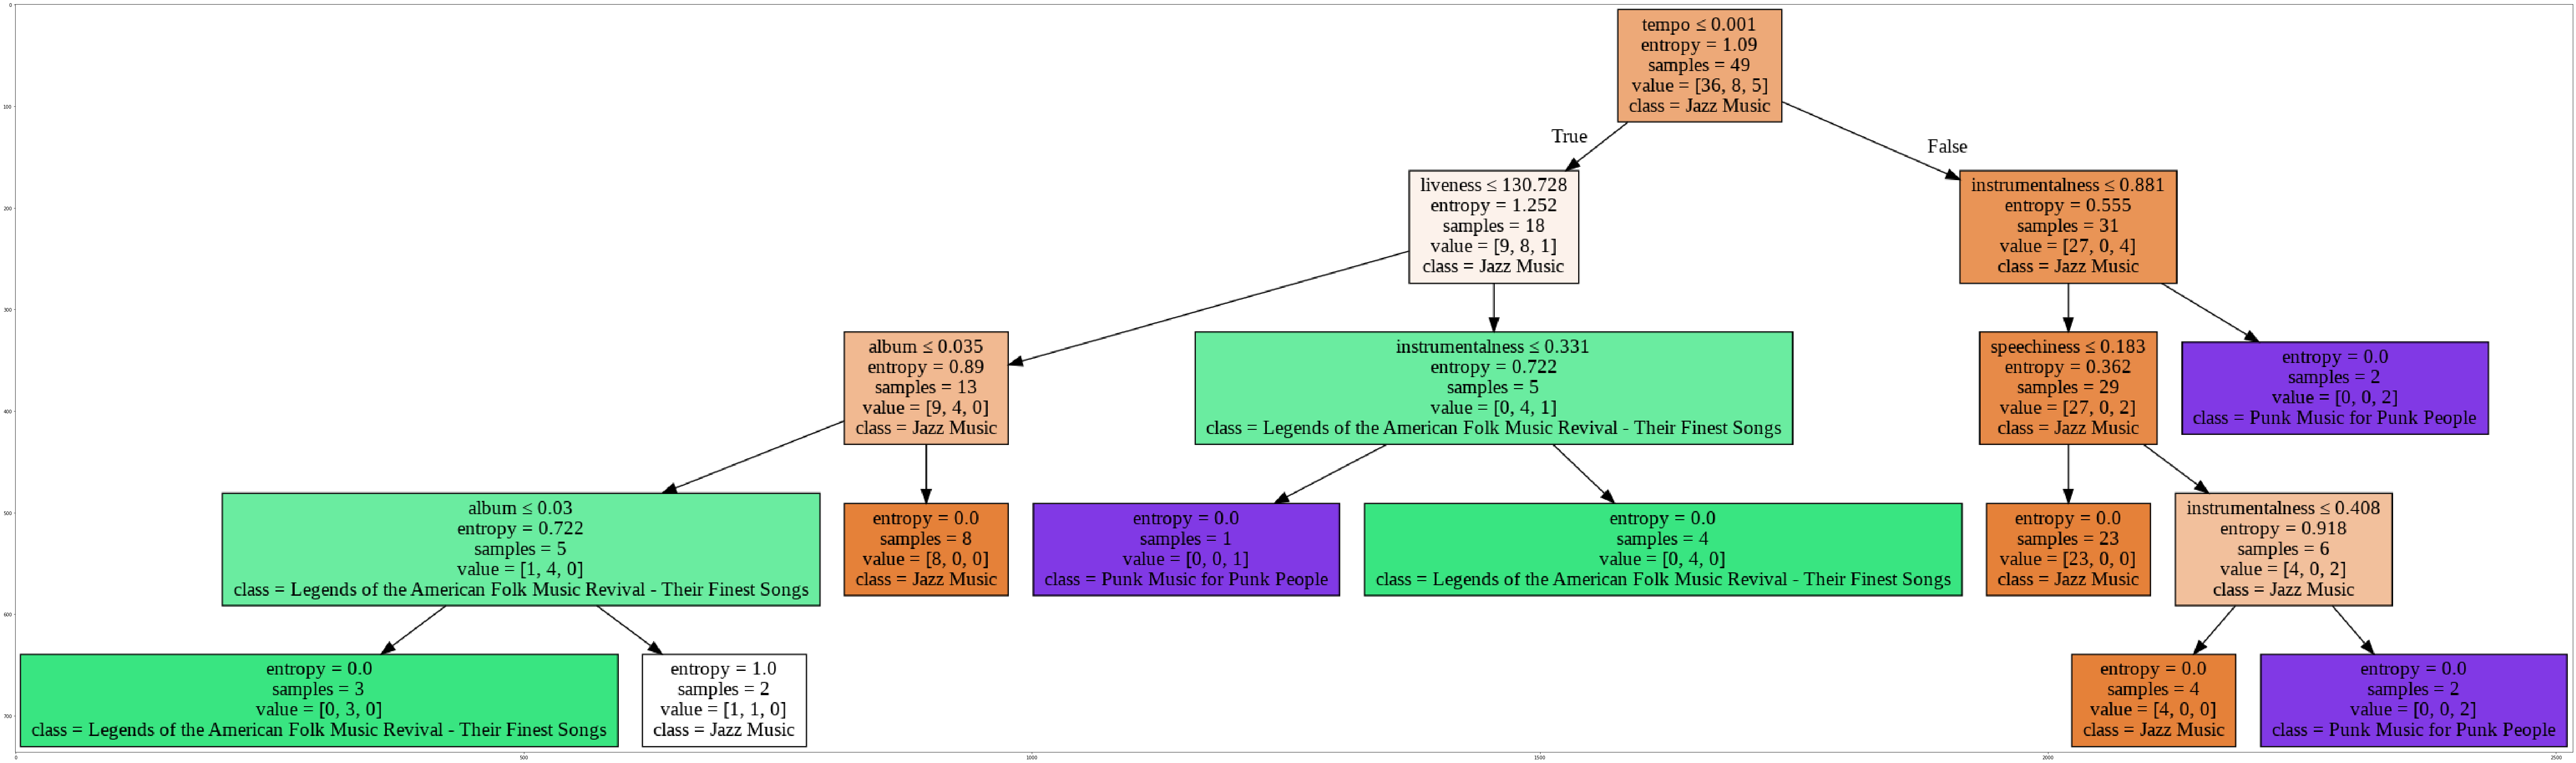

In [0]:
dot_data = StringIO()
filename = "genreTree.png"
featureNames = df.columns[0:5]
targetNames = df["album"].unique().tolist()
out=tree.export_graphviz(genreTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')